In [2]:
from qiskit import *
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import rv_continuous

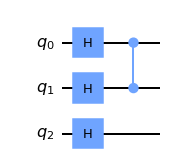

In [8]:
circ = QuantumCircuit(3);
circ.h(0);
circ.h(1);
circ.h(2);
circ.cz(0,1);
circ.draw('mpl')

In [9]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circ,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector();
state_vec = np.asmatrix(out_state).T

In [10]:
print(state_vec);

[[ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [-0.35355339+0.j]
 [ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [-0.35355339+0.j]]


In [22]:
def I(b,j,n,vec):
    newvec = np.zeros((2**(n-1),1));
    for new_index in range(2**(n-1)):
        original_index = new_index%(2**(n-j)) + (new_index//(2**(n-j)))*(2**(n-j+1)) + b*(2**(n-1));
        print(original_index)
        newvec[new_index]=vec[original_index];
    return newvec;
def D(vec1,vec2):
    return 0;
def Q(n,vec):
    sum = 0;
    for j in range(n):
        sum += D(I(0,j,n,vec),I(1,j,n,vec));
    return sum * 4 / n;

In [25]:
print(state_vec)
a=I(0,2,3,state_vec)

[[ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [-0.35355339+0.j]
 [ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [-0.35355339+0.j]]
0
1
4
5


In [26]:
a

array([[0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339]])

In [19]:
a[2]

array([0.])